In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  workclass_Federal-gov  workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               0                      0                    0   

   workclass_Private  ...  origin_descent_Asia  origin_descent_Carib  \
0                  0  ...                    0                     0   
1                  0  ...                    0                     0   
2                  1  ...                    0                     0   
3                  1  ...                    0                     0   
4                  1  ...                    0                     1   

   origin_descent_Central America  origin_descent_Europe  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   origin_descent_North America  origin_descent_South America  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   origin_descent_United States  age_range_adult  age_range_child  \
0                             1                1                0   
1                             1                1                0   
2                             1                1                0   
3                             1                1                0   
4                             0                1                0   

   age_range_senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 64 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
                                ...  
origin_descent_South America    int64
origin_descent_United States    int64
age_range_adult                 int64
age_range_child                 int64
age_range_senior                int64
Length: 64, dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             30162 non-null  int64
 1   fnlwght                         30162 non-null  int64
 2   education_num_yr                30162 non-null  int64
 3   cap_gain                        30162 non-null  int64
 4   cap_loss                        30162 non-null  int64
 5   hours_per_week                  30162 non-null  int64
 6   income_outcome                  30162 non-null  int64
 7   workclass_Federal-gov           30162 non-null  int64
 8   workclass_Local-gov             30162 non-null  int64
 9   workclass_Private               30162 non-null  int64
 10  workclass_Self-emp-inc          30162 non-null  int64
 11  workclass_Self-emp-not-inc      30162 non-null  int64
 12  workclass_State-gov             30162 non-null  int64
 13  w

In [7]:
ml_df = ml_data.copy()

In [8]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 




num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


====Iteration 0  ====

Accuracy:  0.8501574672633847 

Confusion Matrix: 
      0    1
0  4196  329
1   575  933 

====Iteration 1  ====

Accuracy:  0.8451848168407095 

Confusion Matrix: 
      0    1
0  4196  347
1   587  903 

====Iteration 2  ====

Accuracy:  0.8509862423338306 

Confusion Matrix: 
      0    1
0  4206  324
1   575  928 



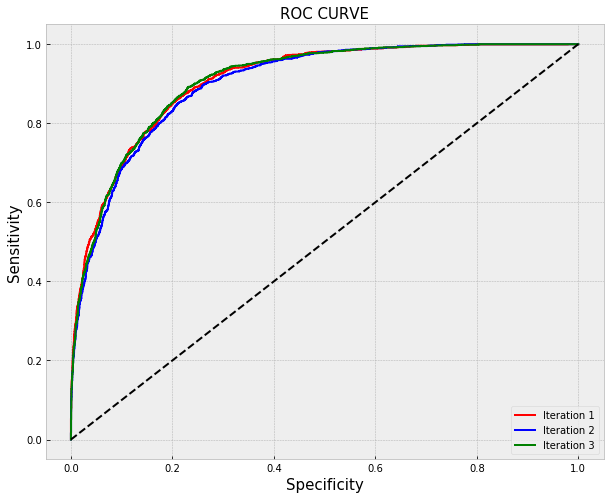

In [9]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [10]:
weights

array([[ 0.49224426,  0.08708263,  0.86479189,  2.26433668,  0.25973774,
         0.23841092,  0.08931141, -0.03323925,  0.03505239,  0.06658823,
        -0.08505975, -0.04321328, -0.12519695, -0.03087634, -0.01929775,
        -0.01369539,  0.2551362 , -0.1642972 , -0.1563516 , -0.091543  ,
        -0.26490664, -0.20714771,  0.17248226,  0.07336012,  0.07979143,
         0.10371121, -0.01559365,  0.47255671, -0.20046931, -0.08744878,
        -0.5368622 , -0.1516637 ,  0.50577599,  0.38477492,  0.0369683 ,
         0.1965042 , -0.04979236, -0.06972639,  0.04454713,  0.02823318,
        -0.04789106,  0.06010553,  0.03750833,  0.22567136, -0.06006572,
         0.04074618, -0.03110878, -0.02406877,  0.02906577, -0.01859736,
        -0.00744431, -0.06745783,  0.02660921, -0.01383807, -0.04557371,
         0.0369683 ,  0.15874655, -0.13621404, -0.10007423],
       [ 0.51155522,  0.09855728,  0.87632035,  2.45832473,  0.25442185,
         0.25986354,  0.09162729, -0.03178112,  0.04704978,  0.

In [11]:


error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [12]:
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8332504558262888 

Confusion Matrix: 
      0    1
0  4221  326
1   680  806 

====Iteration 1  ====

Accuracy:  0.8327531907840212 

Confusion Matrix: 
      0    1
0  4217  324
1   685  807 

====Iteration 2  ====

Accuracy:  0.8264545002486325 

Confusion Matrix: 
      0    1
0  4126  347
1   700  860 



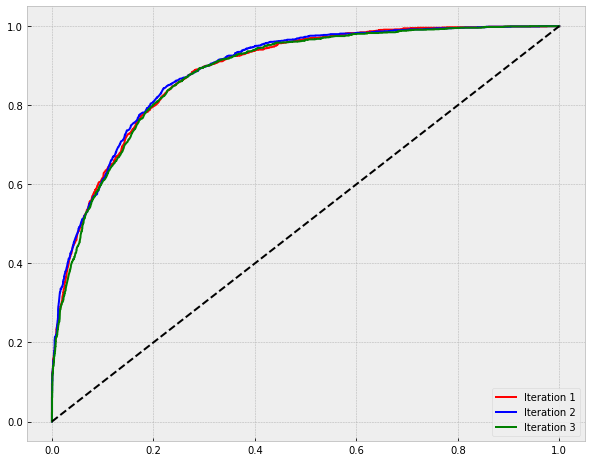

In [13]:
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [14]:
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
ML_std_clf.fit(X_train)
X_train_scaled = ML_std_clf.transform(X_train) 
X_test_scaled = ML_std_clf.transform(X_test) 

In [15]:

import time

t = time.process_time()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

elapsed_time = time.process_time() - t

print(elapsed_time)

accuracy: 0.8526437924747223
[[4241  302]
 [ 587  903]]
34.053404244


In [16]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8485, 59)
(8485,)
[4251 4234]


[[ 2.60095139e-01  5.07110046e-02  6.22585977e-01  1.77638646e+00
   1.85372695e-01  1.29282973e-01  5.75932229e-02 -1.34768279e-02
   2.29667936e-02  4.86375396e-02 -7.04568945e-02 -3.09809089e-02
  -1.50557357e-02 -8.96720566e-03 -7.26209561e-03 -7.27959101e-02
   1.96454062e-01 -1.00566326e-01 -9.19707448e-02 -7.78489432e-02
  -1.44558215e-01 -7.99420709e-02  1.32233771e-01  2.90715237e-02
   5.64641079e-02  7.61254160e-02 -5.83226688e-02  3.76241852e-01
  -2.28541208e-01 -6.21973092e-02 -2.44882805e-01 -1.62530869e-01
   2.94338509e-01  1.55405571e-01  7.03247012e-03  1.07662966e-01
  -5.41208432e-02  1.85770665e-02  6.42690846e-02 -2.59992025e-02
  -2.86146221e-02  1.26193252e-01 -3.17196379e-02  1.14239035e-01
  -3.80311799e-02  1.79390637e-02 -1.59501443e-02 -2.91863226e-02
   2.24111618e-02 -1.82141963e-02 -1.52571553e-03 -2.08899453e-02
  -3.80342877e-03 -1.40567361e-02 -2.28720112e-02  7.03247012e-03
   7.59178315e-02  4.26325641e-14 -8.93350089e-02]]


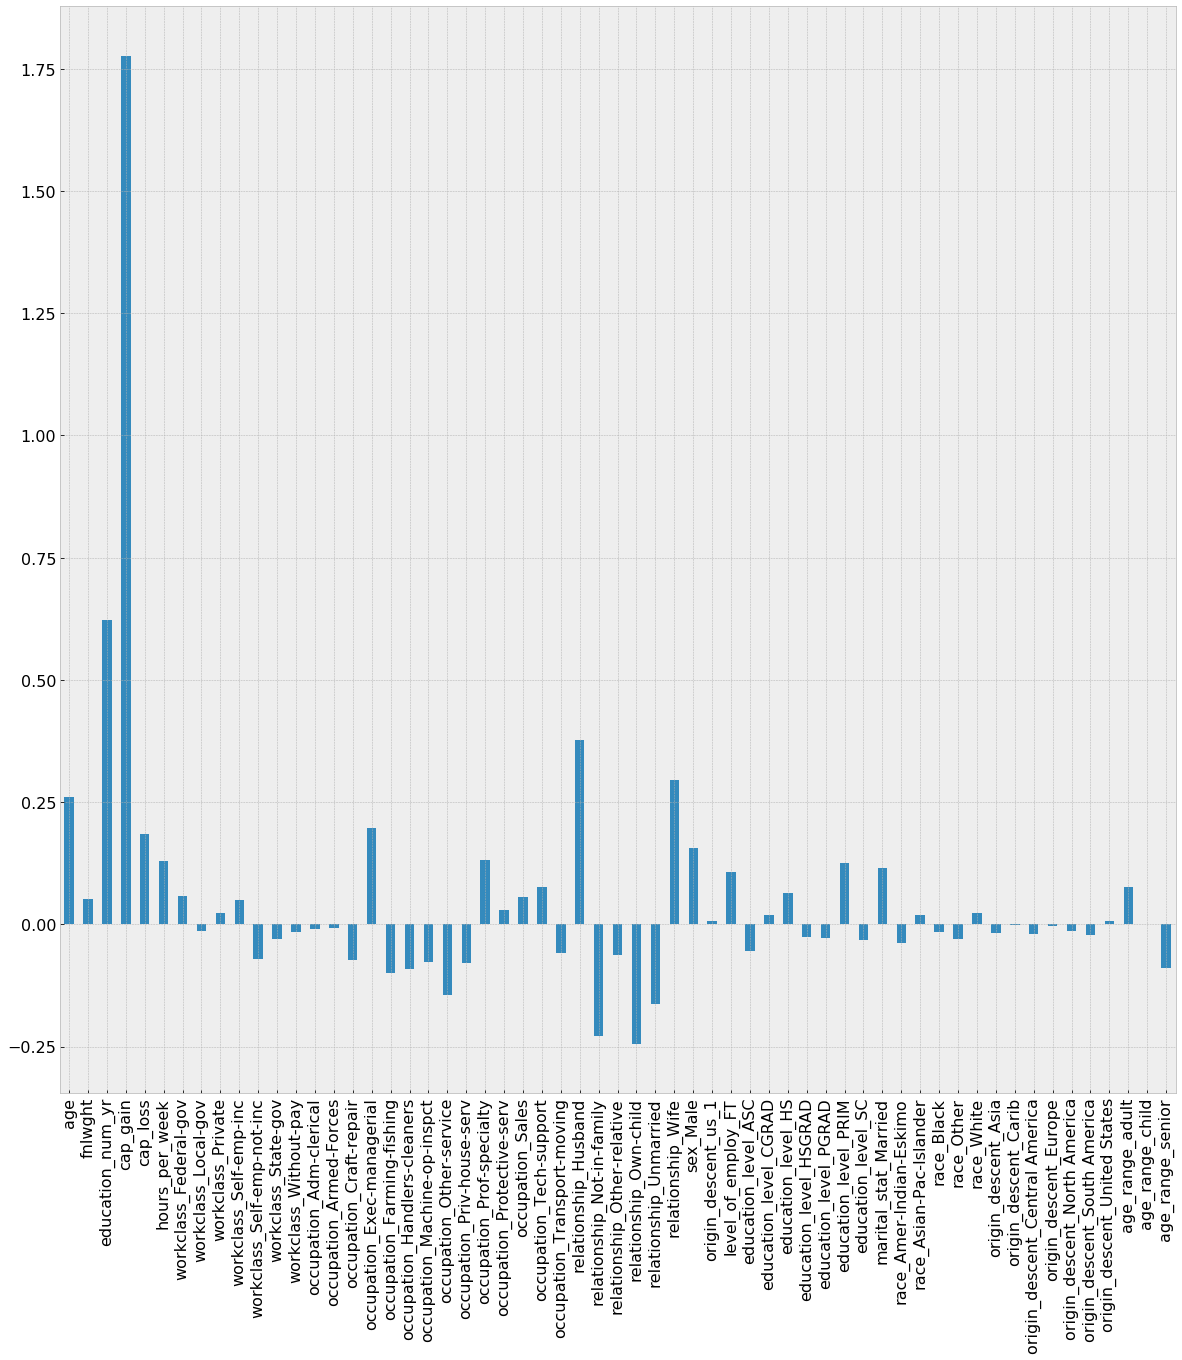

In [17]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [18]:
df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8485 entries, 17743 to 26434
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             8485 non-null   int64
 1   fnlwght                         8485 non-null   int64
 2   education_num_yr                8485 non-null   int64
 3   cap_gain                        8485 non-null   int64
 4   cap_loss                        8485 non-null   int64
 5   hours_per_week                  8485 non-null   int64
 6   workclass_Federal-gov           8485 non-null   int64
 7   workclass_Local-gov             8485 non-null   int64
 8   workclass_Private               8485 non-null   int64
 9   workclass_Self-emp-inc          8485 non-null   int64
 10  workclass_Self-emp-not-inc      8485 non-null   int64
 11  workclass_State-gov             8485 non-null   int64
 12  workclass_Without-pay           8485 non-null   int64
 13

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

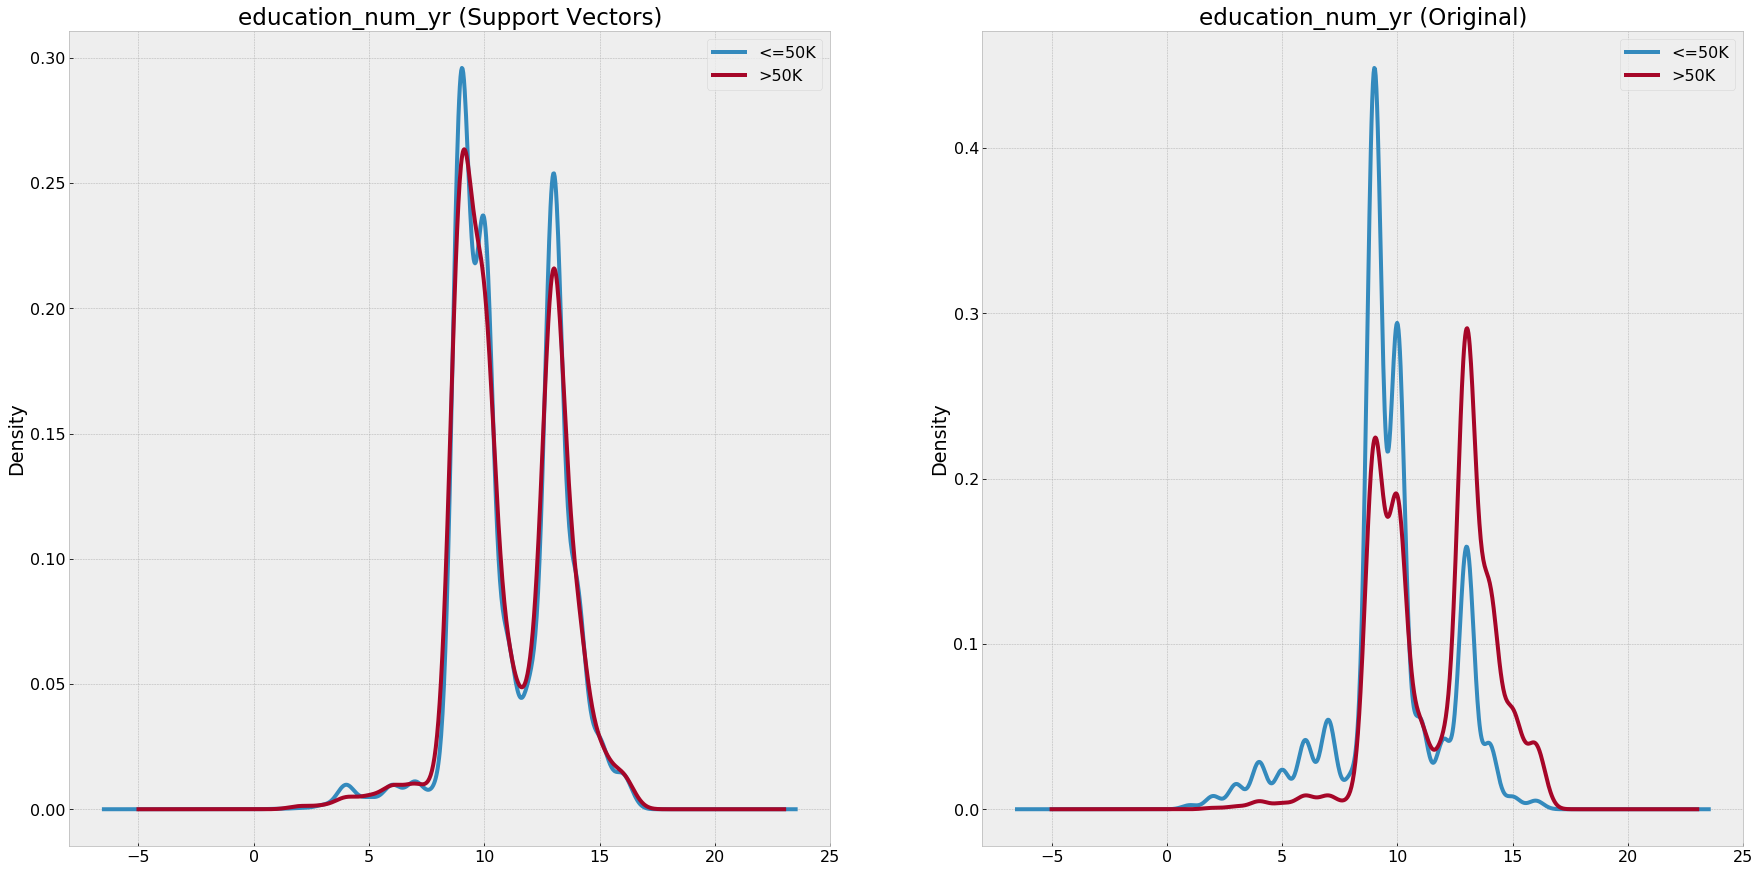

<Figure size 720x288 with 0 Axes>

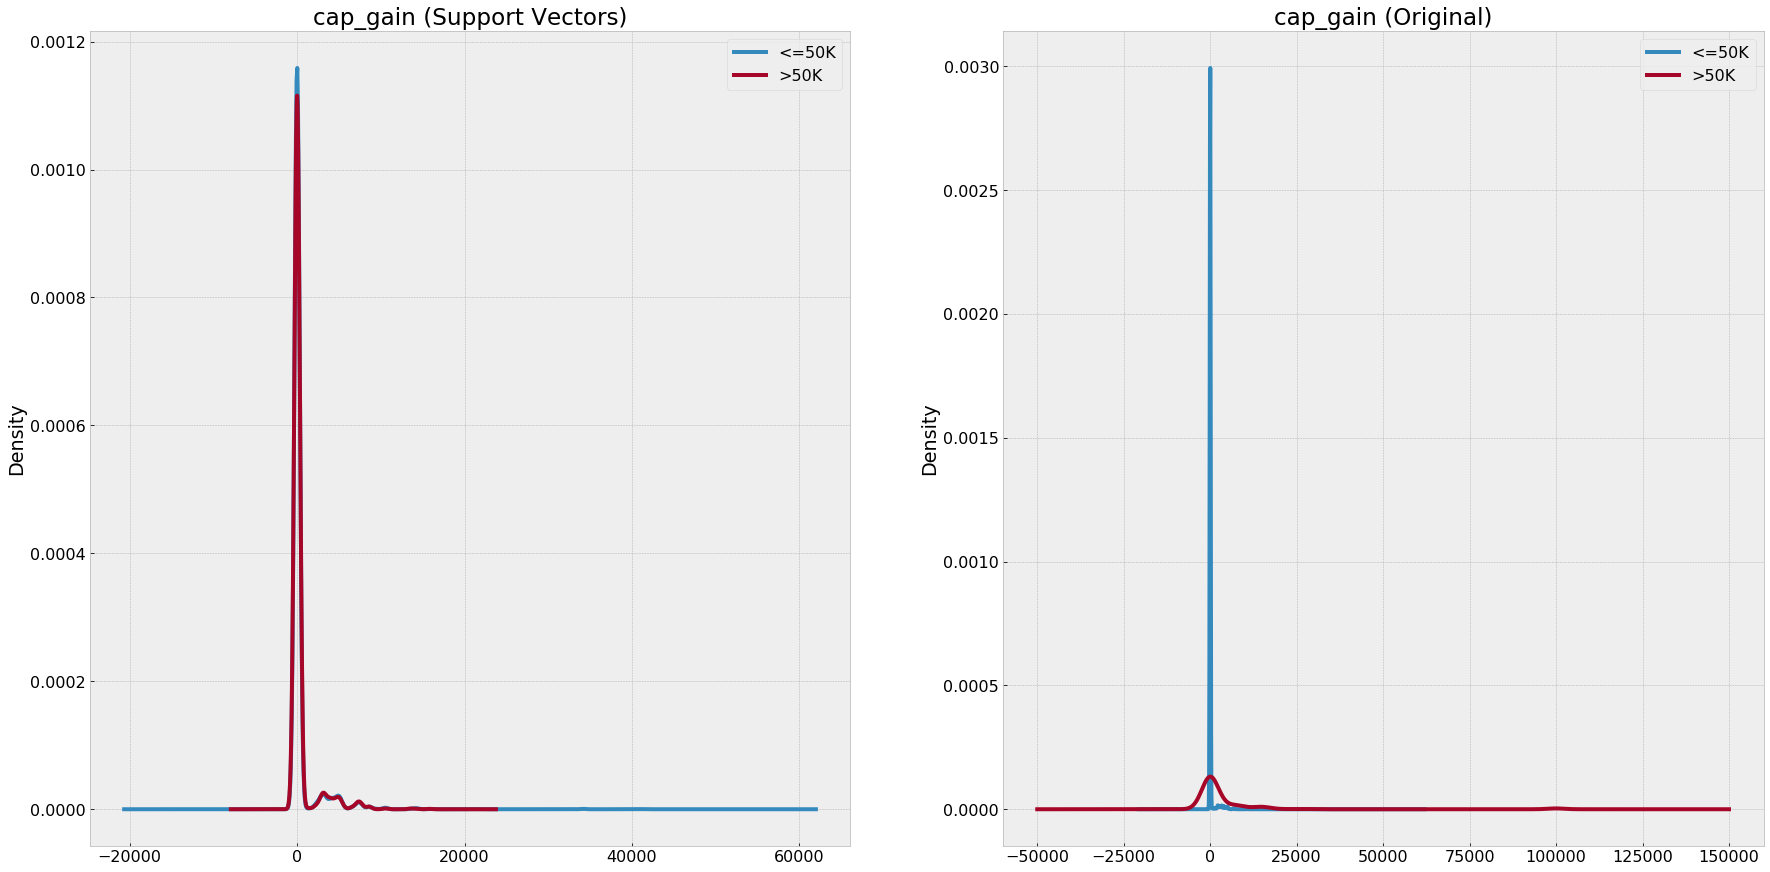

<Figure size 720x288 with 0 Axes>

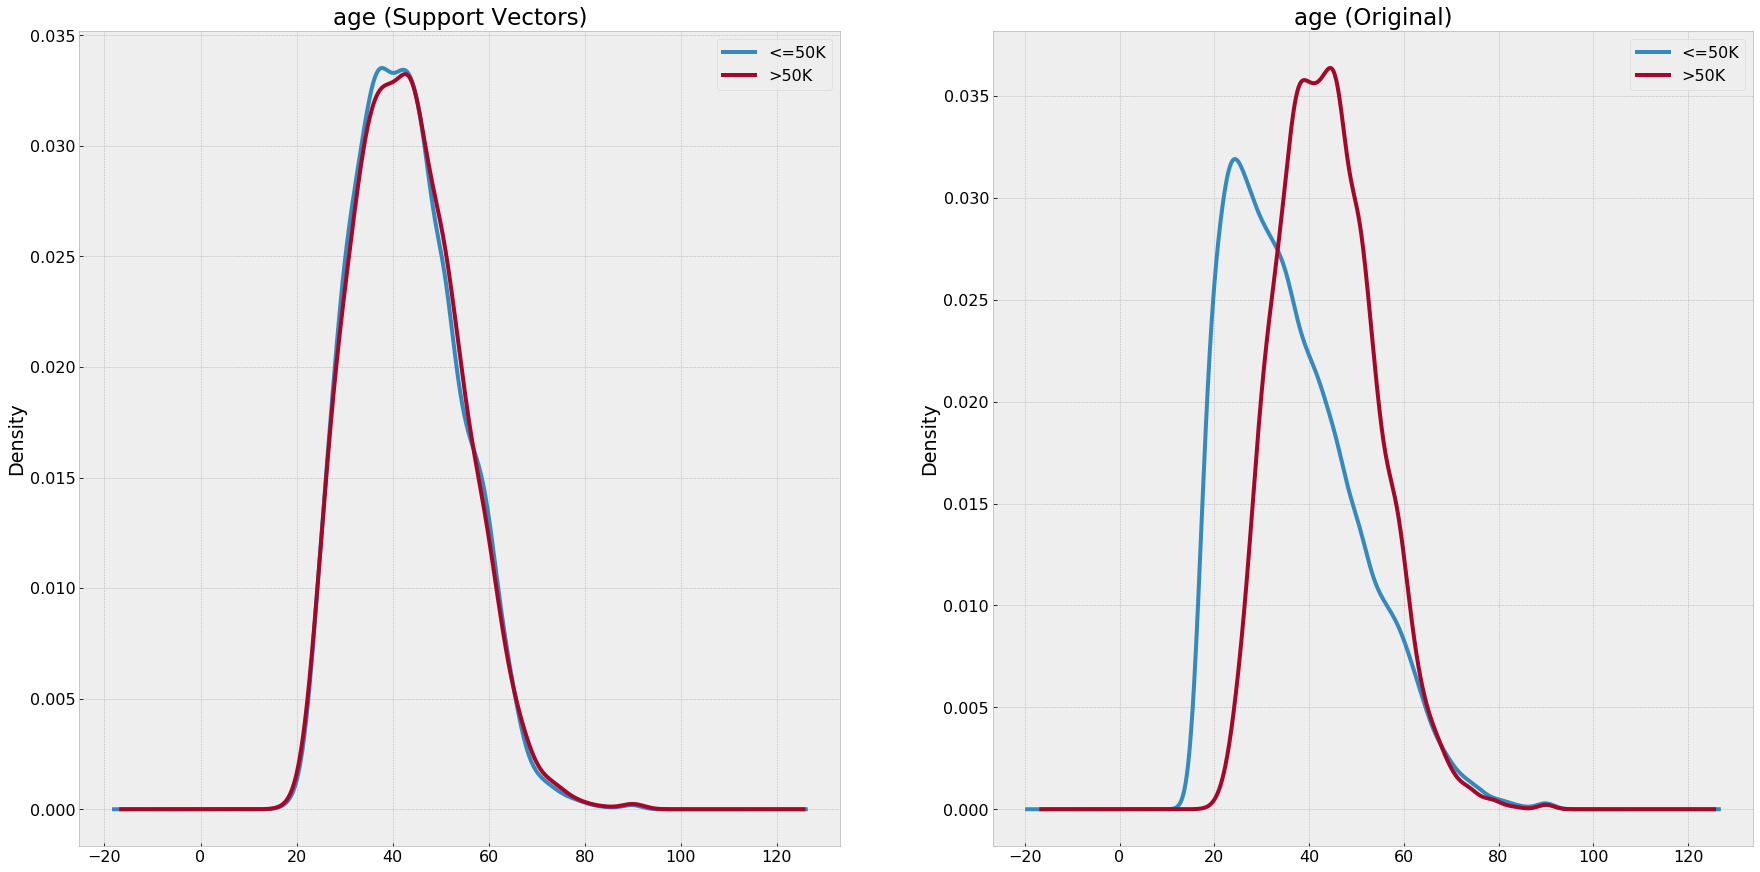

<Figure size 720x288 with 0 Axes>

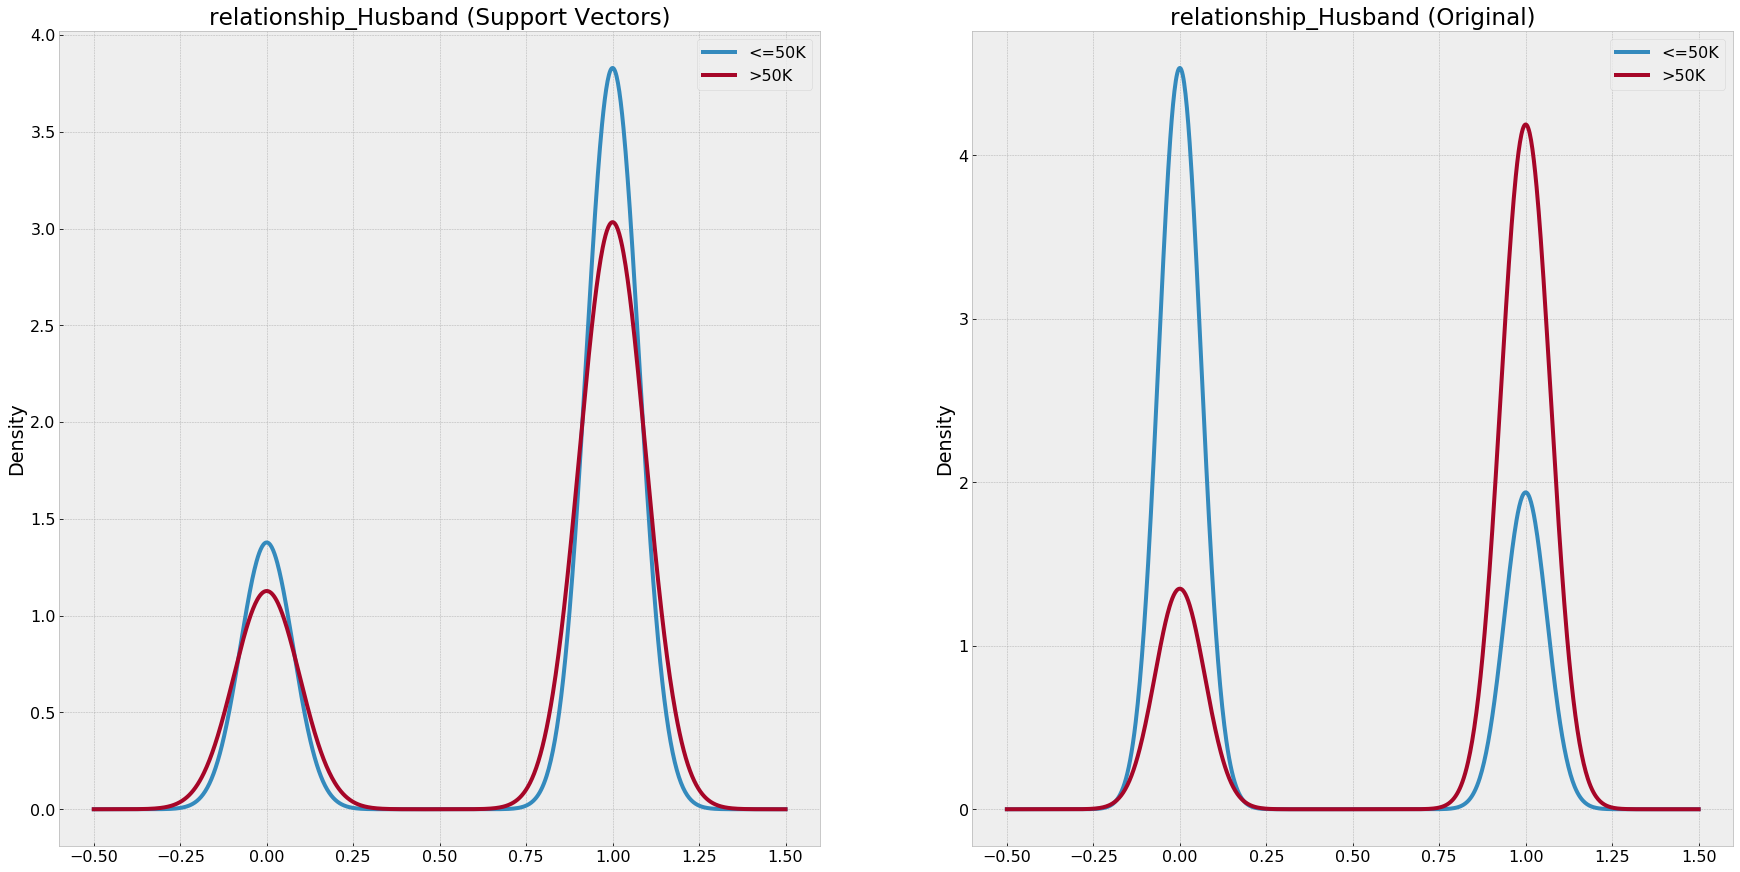

<Figure size 720x288 with 0 Axes>

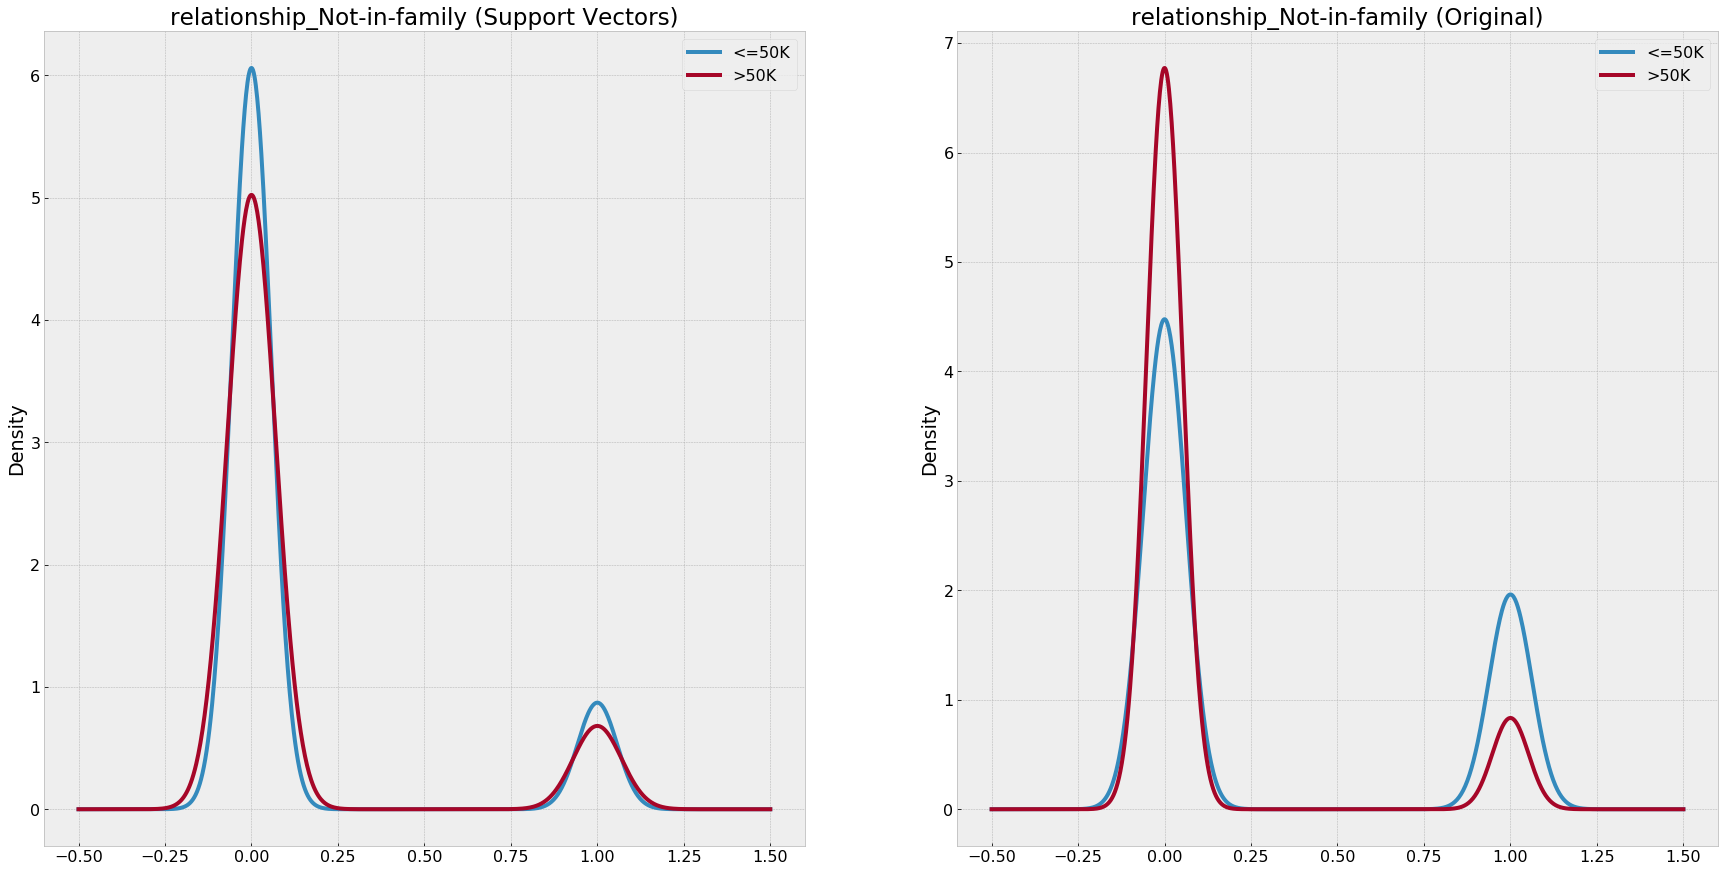

<Figure size 720x288 with 0 Axes>

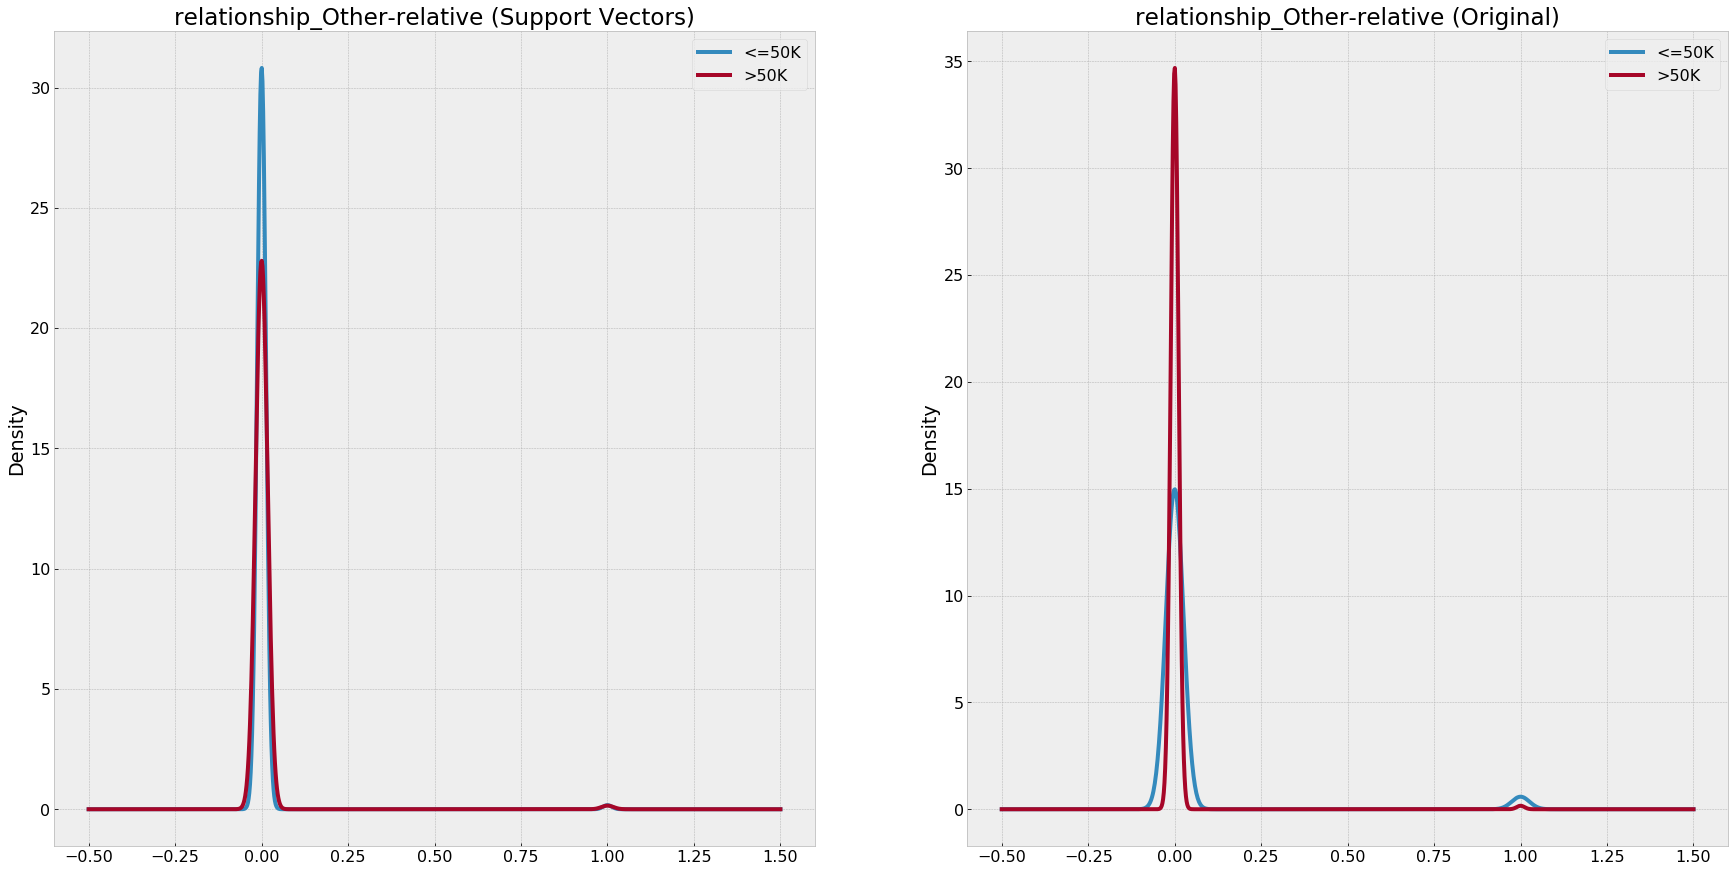

<Figure size 720x288 with 0 Axes>

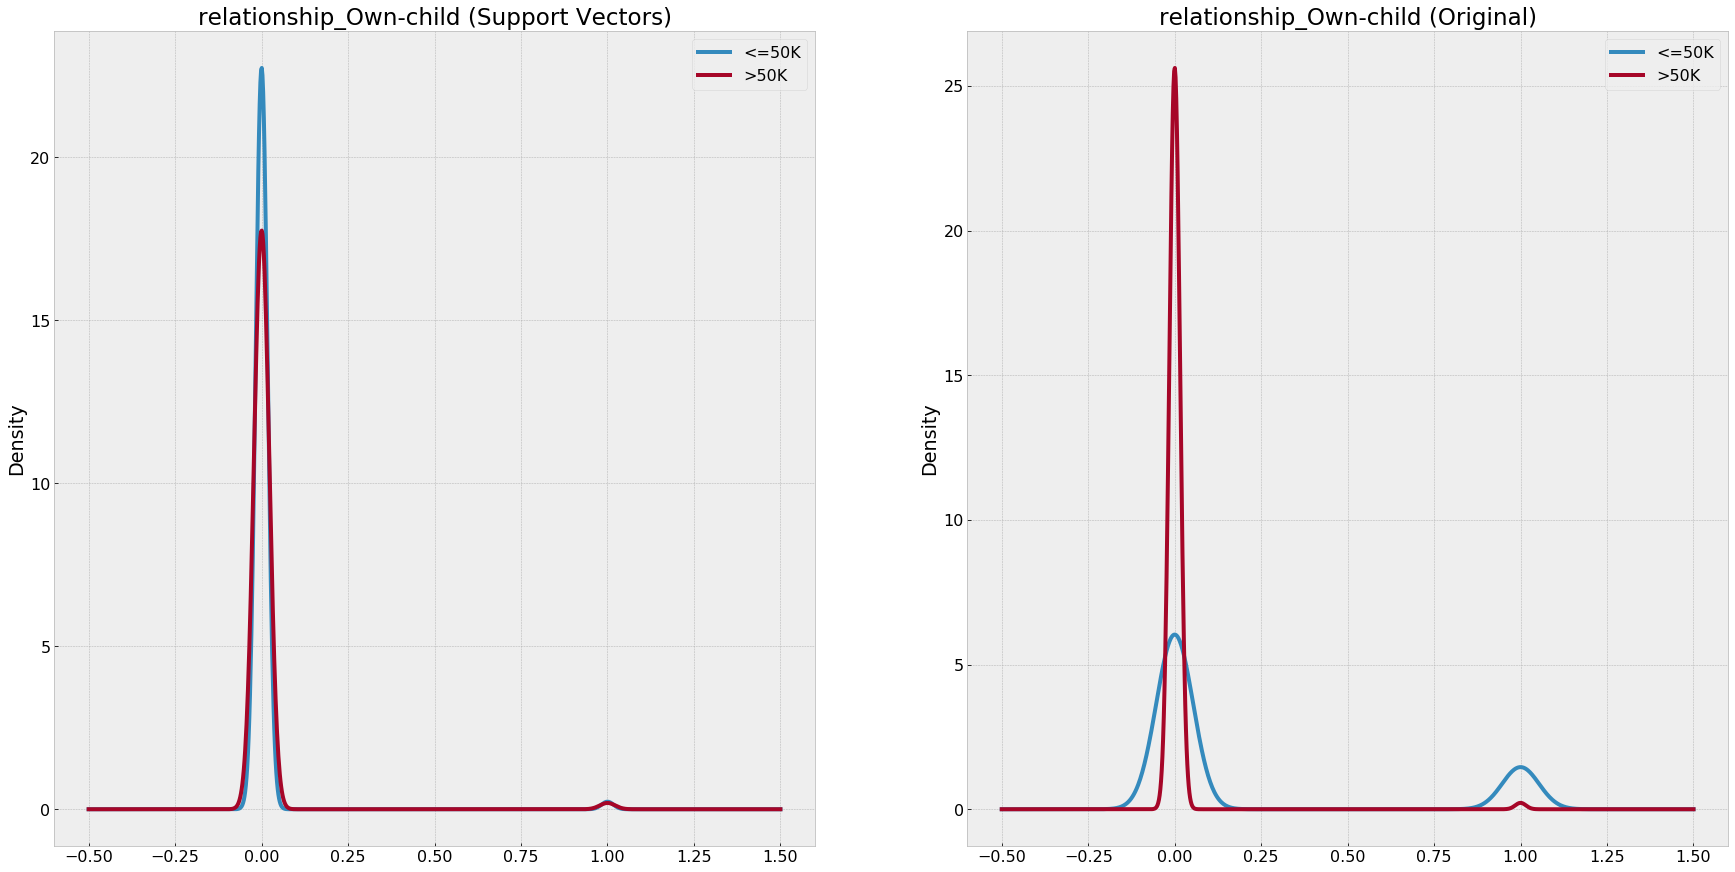

<Figure size 720x288 with 0 Axes>

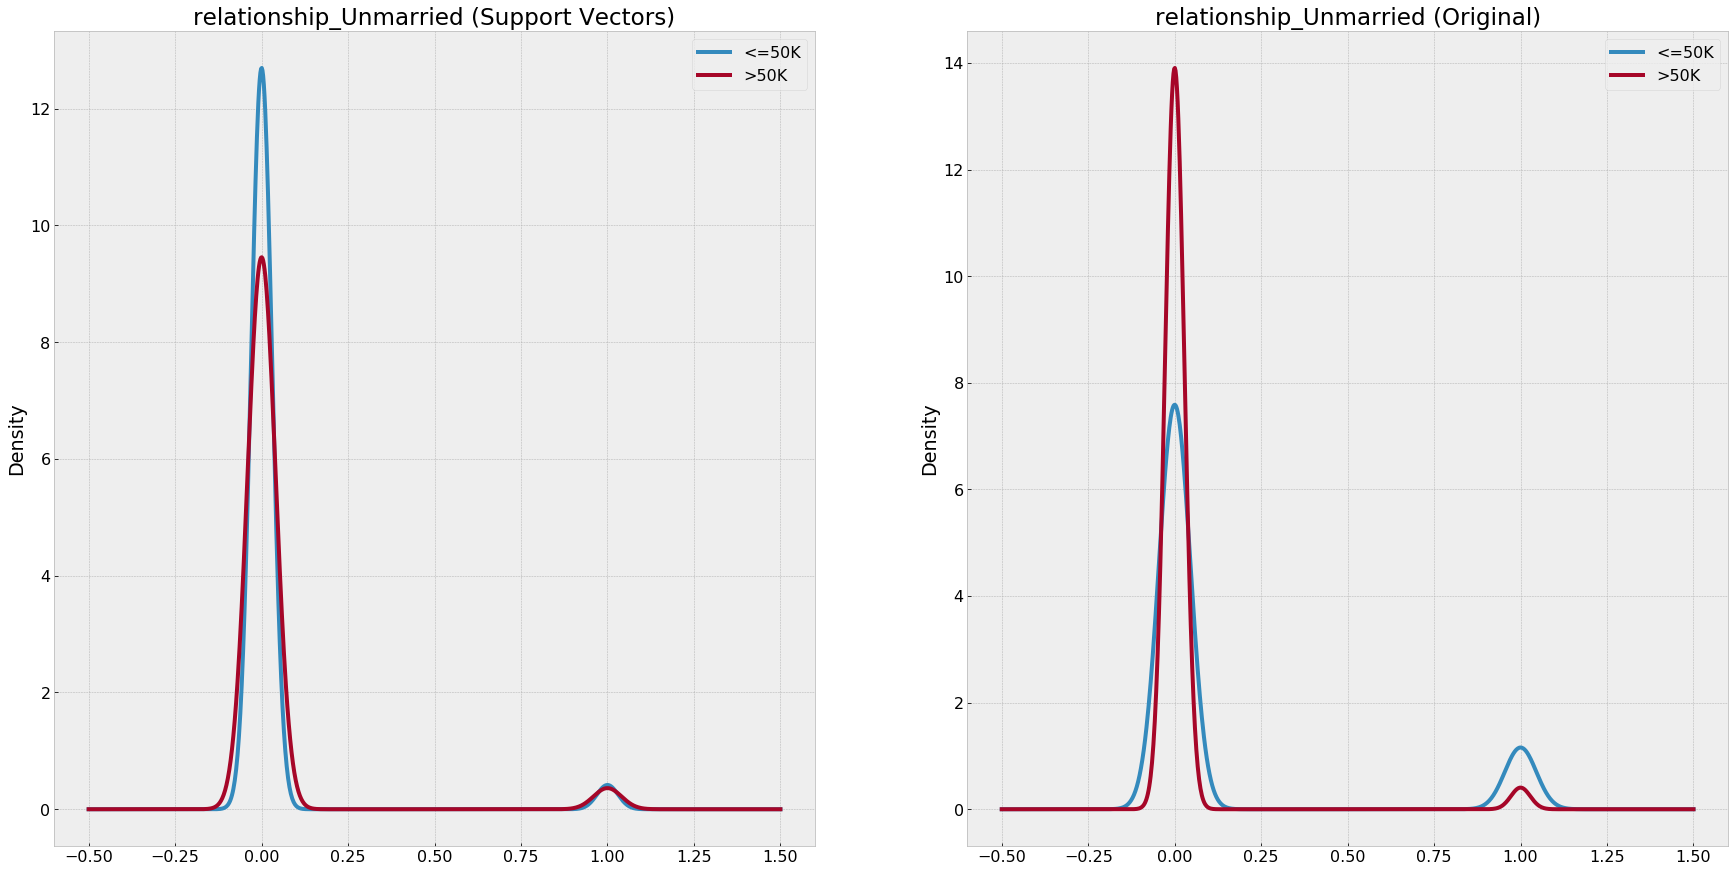

<Figure size 720x288 with 0 Axes>

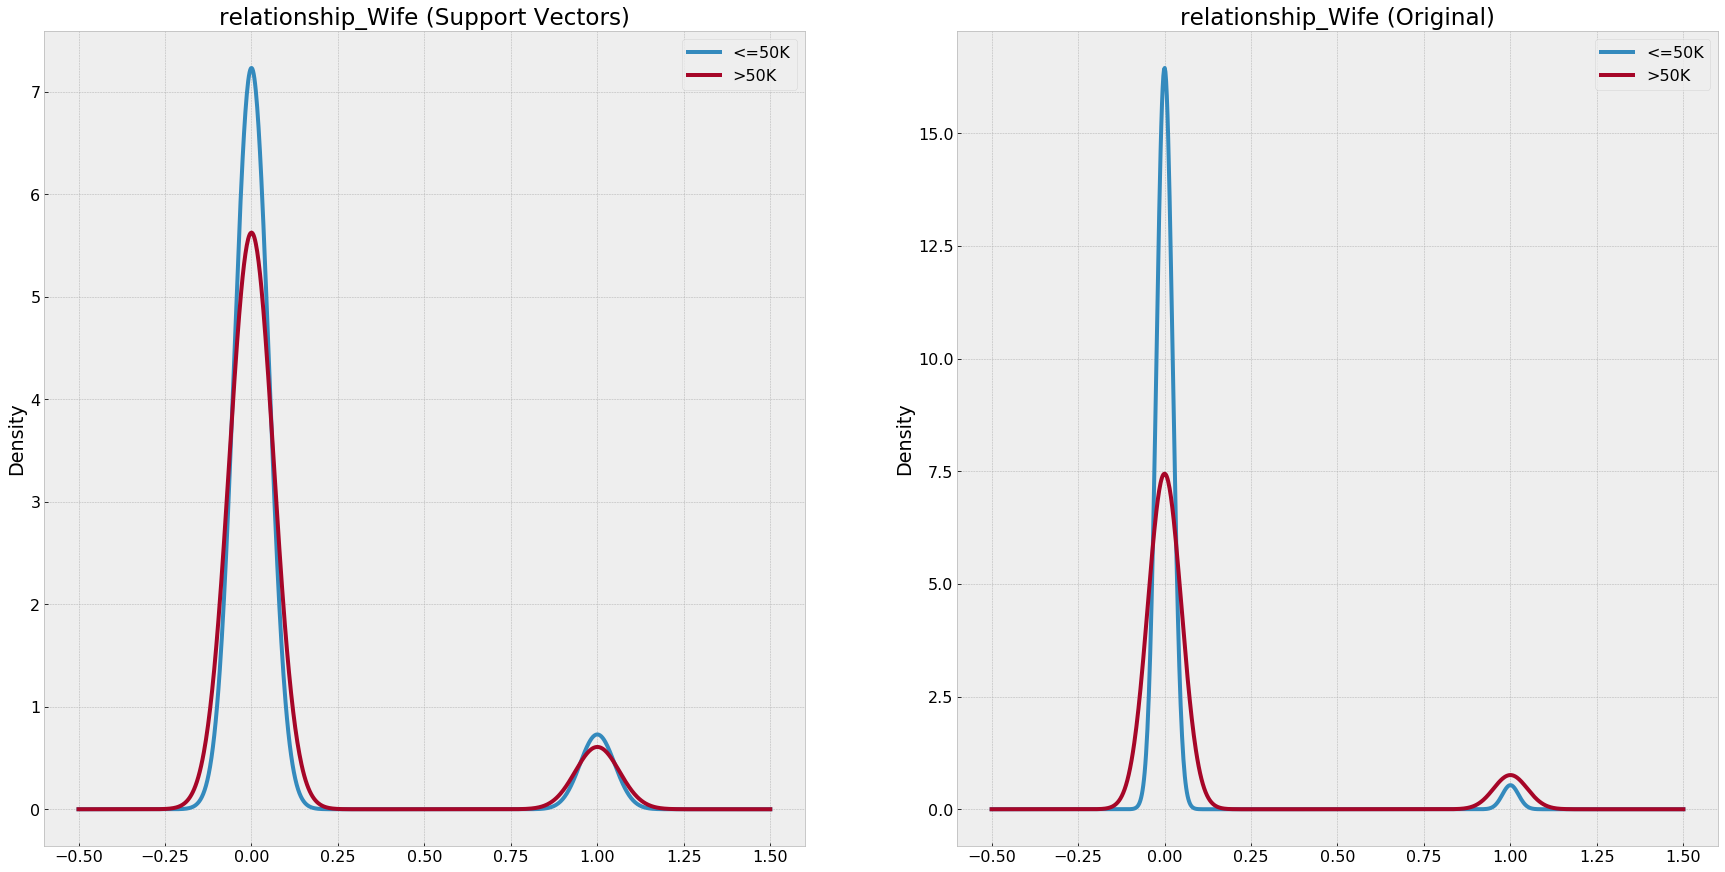

<Figure size 720x288 with 0 Axes>

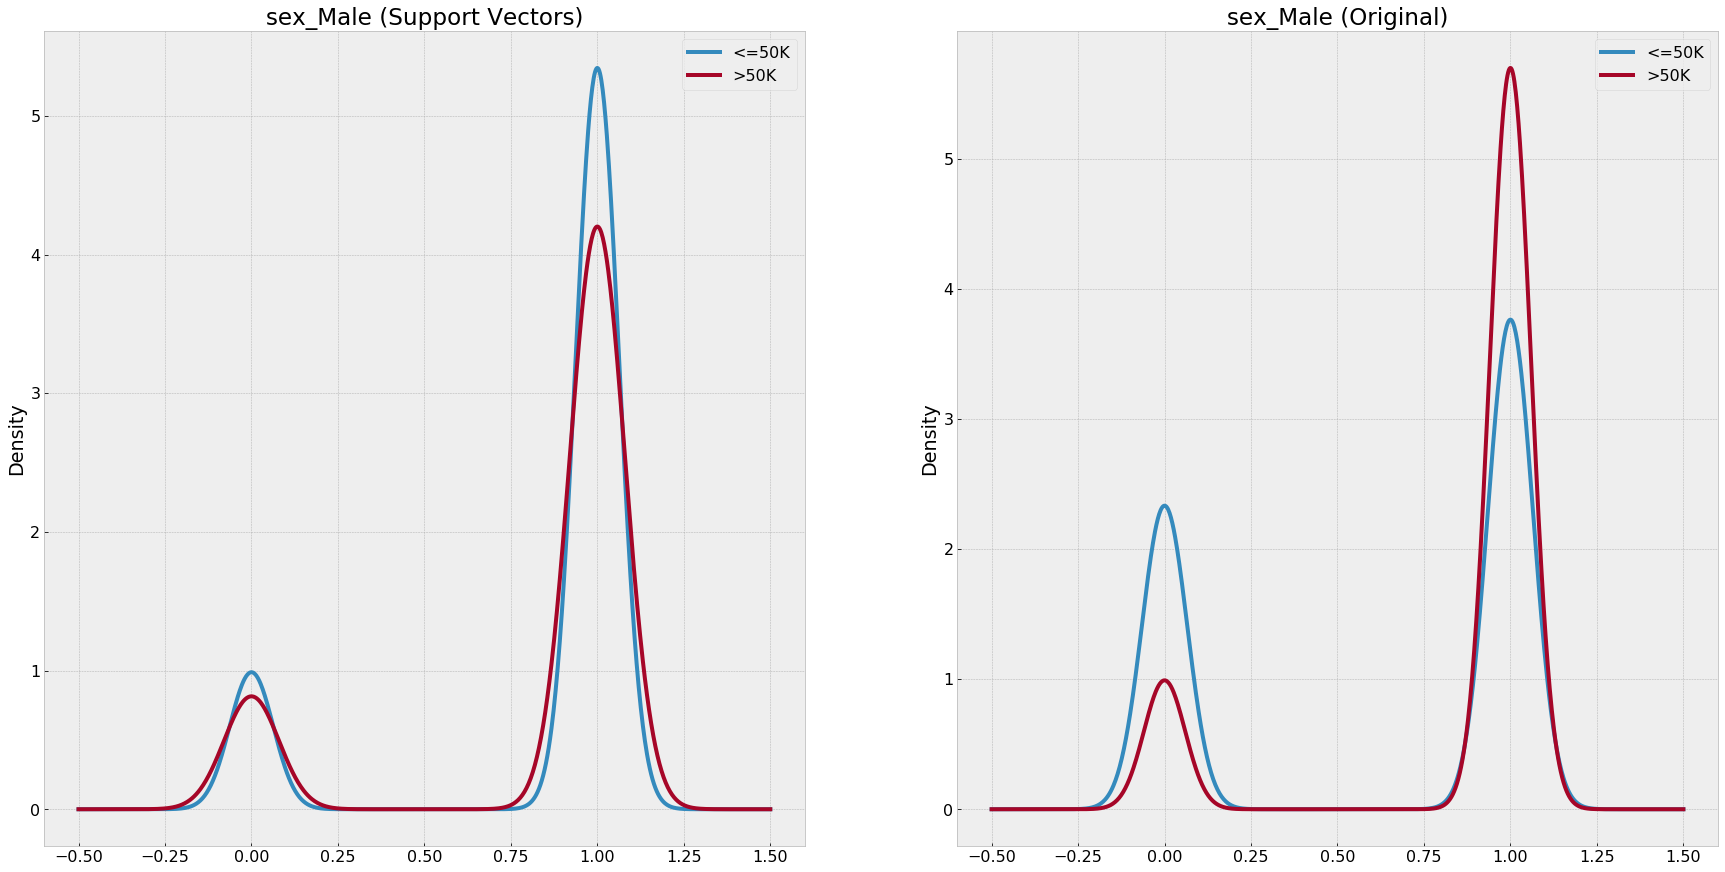

<Figure size 720x288 with 0 Axes>

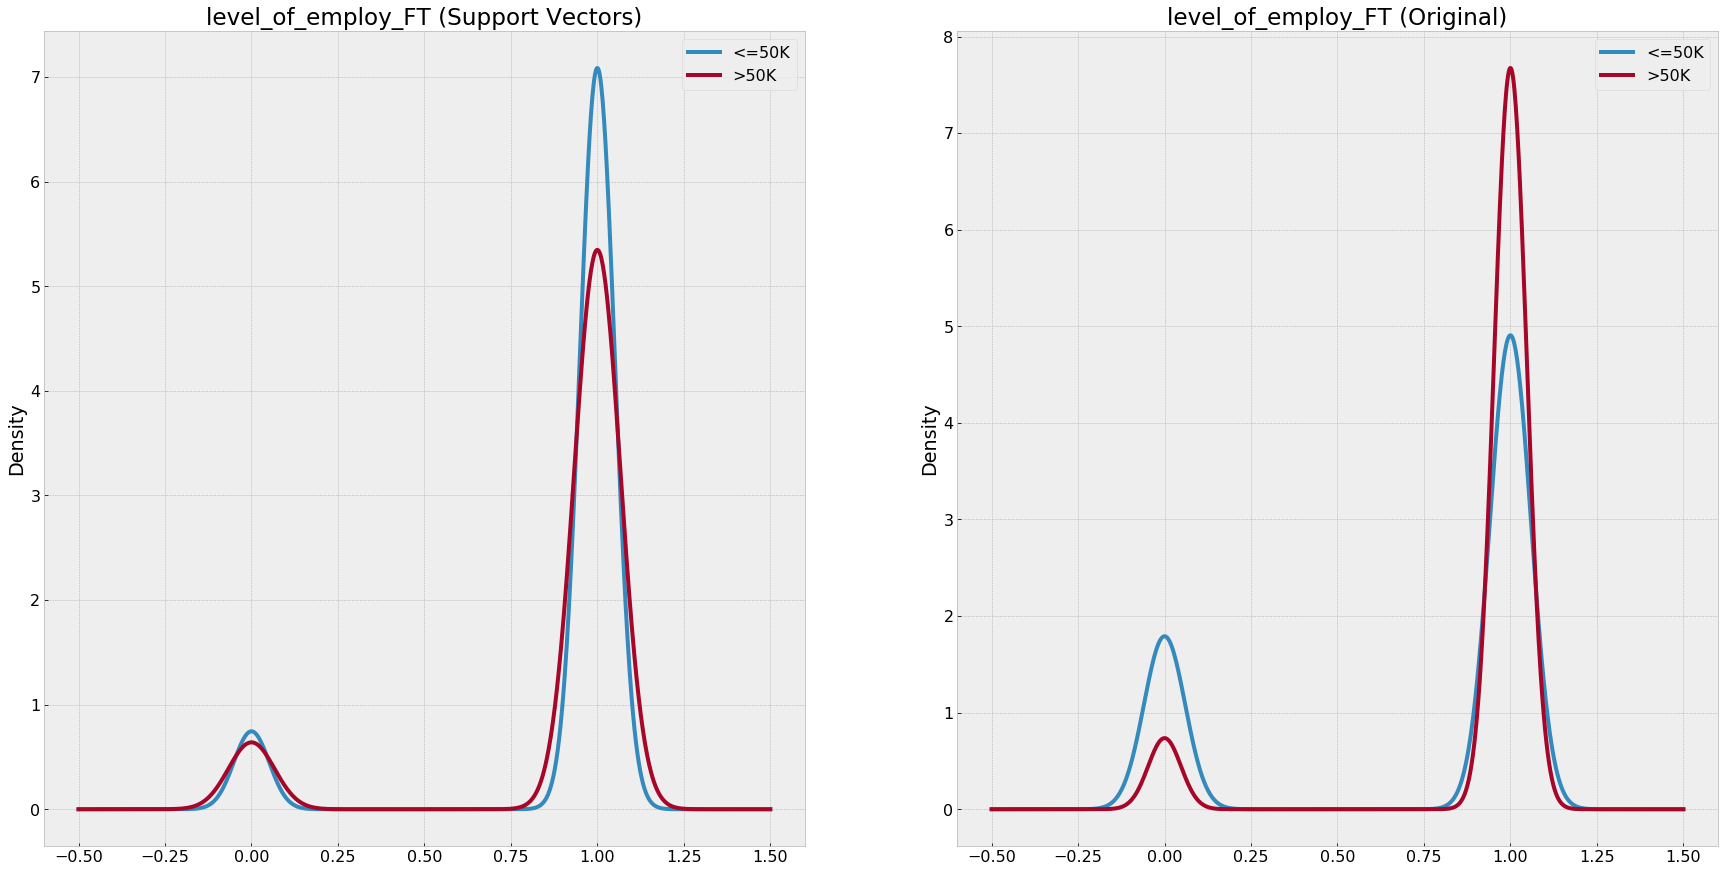

In [19]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In [20]:
import time

t = time.process_time()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

elapsed_time = time.process_time() - t

print(elapsed_time)

accuracy: 0.8509862423338306
[[4255  288]
 [ 611  879]]
35.06868811499999


In [21]:
%%time

from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')


svm_sgd.fit(X_train_scaled,y_train)
yhat = svm_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('SVM:', acc)
print('Confusion Matrix \n', conf)

SVM: 0.8413724515166584
Confusion Matrix 
 [[4286  257]
 [ 700  790]]
CPU times: user 91.5 ms, sys: 71 µs, total: 91.6 ms
Wall time: 69.1 ms


In [22]:
%%time

log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

log_sgd.fit(X_train_scaled,y_train)
yhat = log_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('Logistic Regression:', acc)
print('Confusion Matrix \n', conf)

Logistic Regression: 0.8357367810376264
Confusion Matrix 
 [[4333  210]
 [ 781  709]]
CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 81 ms


Rubric Sections

50 PTS Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them more
accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel
only is fine to use.

10 PTS Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.

30 PTS Use the weights from logistic regression to interpret the importance of different
features for each classification task. Explain your interpretation in detail. Why do you think
some variables are more important?

10 PTS Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain.